In [1]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\young\\Google 드라이브\\drive-download-20181204T145743Z-001'

In [2]:
os.listdir(path='./after')

['Custom.csv',
 'dust.csv',
 'L_point_weather.csv',
 'Master.csv',
 'product_after.csv',
 'Search1.csv',
 'search2_after.csv',
 'session_after.csv',
 'week.csv']

In [3]:
product = pd.read_csv("./after/product_after.csv")
weather = pd.read_csv("./after/L_point_weather.csv")
session = pd.read_csv("./after/session_after.csv")
master= pd.read_csv("./after/Master.csv")
custom =pd.read_csv("./after/Custom.csv")

In [4]:
w_s = session.merge(weather, left_on=['SESS_DT','ZON_NM'], right_on=['DATE','ZON_NM'])

In [5]:
w_s.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,DATE,WEATHER,T_MAX,T_MIN
0,5873599,8641867,9,20180509,82.0,1890.0,mobile,Daejeon,Daejeon,20180509,맑음,9.0,23.0
1,6139048,8646190,381,20180509,414.0,8832.0,tablet,Daejeon,Daejeon,20180509,맑음,9.0,23.0
2,6472180,8628644,43,20180509,95.0,2277.0,mobile,Daejeon,Daejeon,20180509,맑음,9.0,23.0
3,4747936,8652426,1,20180509,13.0,730.0,desktop,Daejeon,Daejeon,20180509,맑음,9.0,23.0
4,4759574,8622778,11,20180509,168.0,1790.0,mobile,Daejeon,Daejeon,20180509,맑음,9.0,23.0


In [6]:
project_main = product.merge(w_s, on=['CLNT_ID','SESS_ID'])
project_main = project_main.merge(master, on =['PD_C'])

In [7]:
project_main.columns

Index(['CLNT_ID', 'SESS_ID', 'HITS_SEQ', 'PD_C', 'PD_ADD_NM', 'PD_BRA_NM',
       'PD_BUY_AM', 'PD_BUY_CT', 'SESS_SEQ', 'SESS_DT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'DVC_CTG_NM', 'ZON_NM', 'CITY_NM', 'DATE', 'WEATHER',
       'T_MAX', 'T_MIN', 'PD_NM', 'CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM'],
      dtype='object')

# 온도 컬럼 명 오류 바로잡기

In [8]:
project_main.rename(columns={'T_MAX':'T_MIN', 'T_MIN': 'T_MAX'},inplace=True)

In [9]:
project_main[['T_MAX']] = project_main[['T_MAX']].astype(int)

In [10]:
project_main['sum']= project_main.PD_BUY_AM * project_main.PD_BUY_CT

In [11]:
project_main.groupby("T_MAX").count()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,ZON_NM,CITY_NM,DATE,WEATHER,T_MIN,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,sum
T_MAX,,,,,,,,,,,,,,,,,,,,,
7,903,903,903,903,903,903,903,903,903,903,...,903,903,903,903,903,903,903,903,903,903
8,12556,12556,12556,12556,12556,12556,12556,12556,12556,12556,...,12556,12556,12556,12556,12556,12556,12556,12556,12556,12556
9,27114,27114,27114,27114,27114,27114,27114,27114,27114,27114,...,27114,27114,27114,27114,27114,27114,27114,27114,27114,27114
10,36230,36230,36230,36230,36230,36230,36230,36230,36230,36230,...,36230,36230,36230,36230,36230,36230,36230,36230,36230,36230
11,20410,20410,20410,20410,20410,20410,20410,20410,20410,20410,...,20410,20410,20410,20410,20410,20410,20410,20410,20410,20410
12,13895,13895,13895,13895,13895,13895,13895,13895,13895,13895,...,13895,13895,13895,13895,13895,13895,13895,13895,13895,13895
13,25931,25931,25931,25931,25931,25931,25931,25931,25931,25931,...,25931,25931,25931,25931,25931,25931,25931,25931,25931,25931
14,26999,26999,26999,26999,26999,26999,26999,26999,26999,26999,...,26999,26999,26999,26999,26999,26999,26999,26999,26999,26999
15,62014,62014,62014,62014,62014,62014,62014,62014,62014,62014,...,62014,62014,62014,62014,62014,62014,62014,62014,62014,62014


## 최고 온도가 7도인 경우가 매우 드물었으므로(이상치) 8도로 변경

In [12]:
tt = project_main.T_MAX

In [13]:
t_result =[]
for i in tt :
    if i == 7:
        t_result.append(8)
    else :
        t_result.append(i)


In [14]:
project_main['T_MAX']=t_result

In [15]:
project_main.groupby("T_MAX").count() # 7도 데이터가 8도에 흡수된것을 볼수있음

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,ZON_NM,CITY_NM,DATE,WEATHER,T_MIN,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,sum
T_MAX,,,,,,,,,,,,,,,,,,,,,
8,13459,13459,13459,13459,13459,13459,13459,13459,13459,13459,...,13459,13459,13459,13459,13459,13459,13459,13459,13459,13459
9,27114,27114,27114,27114,27114,27114,27114,27114,27114,27114,...,27114,27114,27114,27114,27114,27114,27114,27114,27114,27114
10,36230,36230,36230,36230,36230,36230,36230,36230,36230,36230,...,36230,36230,36230,36230,36230,36230,36230,36230,36230,36230
11,20410,20410,20410,20410,20410,20410,20410,20410,20410,20410,...,20410,20410,20410,20410,20410,20410,20410,20410,20410,20410
12,13895,13895,13895,13895,13895,13895,13895,13895,13895,13895,...,13895,13895,13895,13895,13895,13895,13895,13895,13895,13895
13,25931,25931,25931,25931,25931,25931,25931,25931,25931,25931,...,25931,25931,25931,25931,25931,25931,25931,25931,25931,25931
14,26999,26999,26999,26999,26999,26999,26999,26999,26999,26999,...,26999,26999,26999,26999,26999,26999,26999,26999,26999,26999
15,62014,62014,62014,62014,62014,62014,62014,62014,62014,62014,...,62014,62014,62014,62014,62014,62014,62014,62014,62014,62014
16,61405,61405,61405,61405,61405,61405,61405,61405,61405,61405,...,61405,61405,61405,61405,61405,61405,61405,61405,61405,61405


# 소분류 오류 탐색 & 제거작업

In [16]:
project_main.shape

(5024906, 24)

In [17]:
project_main.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,CITY_NM,DATE,WEATHER,T_MIN,T_MAX,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,sum
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],39000.0,1.0,1,20180526,...,Seoul,20180526,맑음/안개,14.0,30,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,39000.0
1,4139680,7605037,28,642112,색상:카바나,[바비브라운],39000.0,1.0,1,20180526,...,Seoul,20180526,맑음/안개,14.0,30,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,39000.0
2,4139680,7605037,12,642112,색상:카바나,[바비브라운],39000.0,1.0,1,20180526,...,Seoul,20180526,맑음/안개,14.0,30,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,39000.0
3,4139680,7605037,28,642112,색상:워터멜론,[바비브라운],39000.0,1.0,1,20180526,...,Seoul,20180526,맑음/안개,14.0,30,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,39000.0
4,4350334,2023661,77,642112,색상:엔젤 / 1개,바비브라운,39000.0,1.0,528,20180827,...,Seoul,20180827,흐림/비/이슬비,20.0,25,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,39000.0


In [18]:
pp=[]
result=[]
for i,j in zip(project_main.PD_NM, project_main.CLAC3_NM):
    
    if (((("여름" not in i)and("남여" not in i) and("남,여" not in i)) and ("여"in i))   or
        ("아동"in i)or ("여아"in i) or ("남아"in i) or ("유아"in i) or ("여성"in i) or ("여자"in i)) and ("남성" in j):
        pp.append(i)
        result.append(i)
    else :
        result.append("T")

In [19]:
len(pp)

191680

# 자그마치 19만건의 데이터가 오류

In [20]:
project_main["plus"]=result

In [21]:
project_main[project_main.plus != 'T']

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,DATE,WEATHER,T_MIN,T_MAX,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,sum,plus
4773,4160219,9232020,32,368706,색상:화이트|사이즈:100(L) / 1개,내셔널지오그래픽(남성),39000.0,1.0,105,20180429,...,20180429,구름조금/안개,10.0,28,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S),남성의류,남성의류상의,남성티셔츠,39000.0,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S)
4774,4160219,9232020,74,368706,색상:네이비|사이즈:100(L) / 1개,내셔널지오그래픽(남성),39000.0,1.0,105,20180429,...,20180429,구름조금/안개,10.0,28,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S),남성의류,남성의류상의,남성티셔츠,39000.0,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S)
4775,5067327,7934058,235,368706,색상:그레이|사이즈:95(M) / 1개,내셔널지오그래픽(남성),39000.0,1.0,42,20180521,...,20180521,구름조금,11.0,24,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S),남성의류,남성의류상의,남성티셔츠,39000.0,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S)
4776,5558177,6113065,44,368706,색상:네이비/사이즈:여성85(S),[내셔널지오그래픽(남성)],39000.0,1.0,8,20180620,...,20180620,구름많음/안개,19.0,28,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S),남성의류,남성의류상의,남성티셔츠,39000.0,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S)
4777,5067327,7922460,59,368706,색상:그레이|사이즈:95(M) / 1개,내셔널지오그래픽(남성),39000.0,1.0,44,20180521,...,20180521,구름조금,11.0,26,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S),남성의류,남성의류상의,남성티셔츠,39000.0,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S)
4778,5354415,9677079,101,368706,색상:화이트|사이즈:110(XXL) / 1개,내셔널지오그래픽(남성),39000.0,1.0,46,20180422,...,20180422,흐림/비,11.0,21,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S),남성의류,남성의류상의,남성티셔츠,39000.0,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S)
4779,4998345,9713288,41,368706,색상:블랙|사이즈:105(XL) / 1개,내셔널지오그래픽(남성),39000.0,1.0,2,20180421,...,20180421,구름조금/안개,14.0,23,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S),남성의류,남성의류상의,남성티셔츠,39000.0,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S)
4780,4998345,9713288,41,368706,색상:화이트|사이즈:105(XL) / 1개,내셔널지오그래픽(남성),39000.0,1.0,2,20180421,...,20180421,구름조금/안개,14.0,23,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S),남성의류,남성의류상의,남성티셔츠,39000.0,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S)
4781,4117651,7742974,92,368706,색상:네이비|사이즈:여성85(S) / 1개,내셔널지오그래픽(남성),39000.0,1.0,43,20180524,...,20180524,맑음/안개,12.0,21,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S),남성의류,남성의류상의,남성티셔츠,39000.0,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S)
4782,5133846,9341793,27,368706,색상:블랙|사이즈:여성90(M) / 1개,내셔널지오그래픽(남성),39000.0,1.0,24,20180427,...,20180427,맑음/안개,10.0,23,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S),남성의류,남성의류상의,남성티셔츠,39000.0,유니섹스 네오디 기본 로고 반팔 티셔츠 N172UTS010 - 네이비 / 여성85(S)


In [22]:
project_main.columns

Index(['CLNT_ID', 'SESS_ID', 'HITS_SEQ', 'PD_C', 'PD_ADD_NM', 'PD_BRA_NM',
       'PD_BUY_AM', 'PD_BUY_CT', 'SESS_SEQ', 'SESS_DT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'DVC_CTG_NM', 'ZON_NM', 'CITY_NM', 'DATE', 'WEATHER',
       'T_MIN', 'T_MAX', 'PD_NM', 'CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM', 'sum',
       'plus'],
      dtype='object')

In [23]:
project_tot = project_main.merge(custom, on = "CLNT_ID")

In [24]:
project_tot.shape

(3988587, 27)

## 30~40대 여성 데이터만 추출

In [25]:
project_main = project_tot[project_tot.CLNT_AGE == (30 or 40)]

project_main= project_main[project_main.CLNT_GENDER == "F"]

In [26]:
project_main.shape

(1569561, 27)

In [27]:
project_main[project_main.plus != "T"].shape # 오류데아터 5만6천건 

(56212, 27)

In [28]:
project_main= project_main[project_main.plus == "T"]

In [29]:
project_main.shape

(1513349, 27)

## 온도에 따른 구매액 추이

In [30]:
T_MAX_sum_plot= project_main.groupby("T_MAX").sum()[['sum']] # 총구매액
T_MAX_mean_plot= project_main.groupby("T_MAX").mean()[['sum']] # 평균구매액

In [31]:
os.listdir('../08_python/빅데이터 교육/판다스/fonts')

['malgun.ttf', 'NanumPen.ttf']

In [32]:
u=[]
for i in range(8,41):
    u.append(i)
# 시각화 작업을 위한 모듈 로딩작업
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="../08_python/빅데이터 교육/판다스/fonts/malgun.ttf").get_name()

# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
font_name = font_manager.FontProperties(fname="../08_python/빅데이터 교육/판다스/fonts/malgun.ttf").get_name()

plt.rcParams["font.family"]= 'Malgun Gothic'

font_name

plt.rc('font', family=font_name)
import matplotlib as mpl

import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

font_list_mac = fm.OSXInstalledFonts()

path = '../08_python/빅데이터 교육/판다스/fonts/malgun.ttf'
font_main = fm.FontProperties(fname=path, size=14)
font_label =fm.FontProperties(fname=path, size=12)
font_ticks =fm.FontProperties(fname=path, size=10)


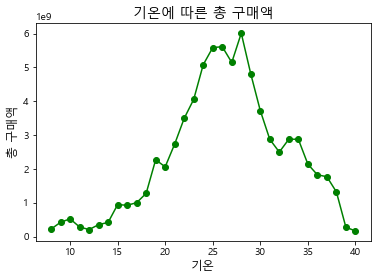

In [33]:
from matplotlib import pyplot as plt
temp = u
plt.plot(temp,T_MAX_sum_plot,color='green',marker='o',linestyle='solid')
plt.title('기온에 따른 총 구매액', fontproperties=font_main)
plt.ylabel("총 구매액", fontproperties=font_label)
plt.xlabel("기온", fontproperties=font_label)
plt.show()

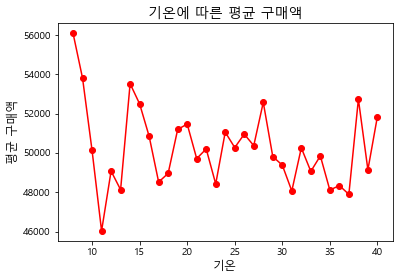

In [34]:
from matplotlib import pyplot as plt
temp = u
plt.plot(temp,T_MAX_mean_plot,color='red',marker='o',linestyle='solid')
plt.title('기온에 따른 평균 구매액', fontproperties=font_main)
plt.ylabel("평균 구매액", fontproperties=font_label)
plt.xlabel("기온", fontproperties=font_label)
plt.show()

## 기온에 따른 구매량 추이

In [35]:
T_MAX_sum_CT_plot= project_main.groupby("T_MAX").sum()[['PD_BUY_CT']] # 총구매량
T_MAX_mean_CT_plot= project_main.groupby("T_MAX").mean()[['PD_BUY_CT']] # 평균구매량

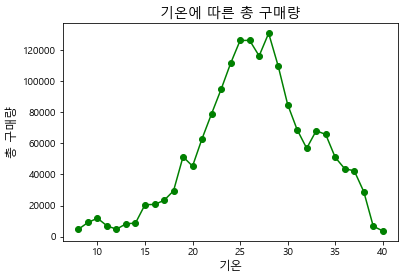

In [36]:
from matplotlib import pyplot as plt
temp = u
plt.plot(temp,T_MAX_sum_CT_plot,color='green',marker='o',linestyle='solid')
plt.title('기온에 따른 총 구매량', fontproperties=font_main)
plt.ylabel("총 구매량", fontproperties=font_label)
plt.xlabel("기온", fontproperties=font_label)
plt.show()

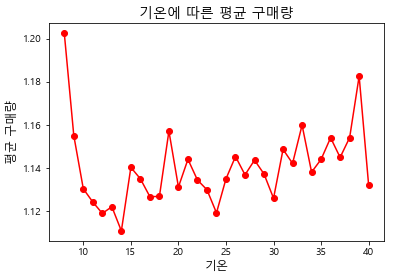

In [37]:
from matplotlib import pyplot as plt
temp = u
plt.plot(temp,T_MAX_mean_CT_plot,color='red',marker='o',linestyle='solid')
plt.title('기온에 따른 평균 구매량', fontproperties=font_main)
plt.ylabel("평균 구매량", fontproperties=font_label)
plt.xlabel("기온", fontproperties=font_label)
plt.show()

# 2. 기온에 따른 구매 상품군(소분류) 추이분석

## 소분류 구매량 기준 top10 , 구매액 기준 top 10

# 수정 전 비교

In [38]:
project_before = project_tot[project_tot.CLNT_AGE == (30 or 40)]

project_before = project_before[project_before.CLNT_GENDER == "F"]

print("수정전 데이터 수", project_before.shape[0])
print("수정후 데이터 수", project_main.shape[0])

수정전 데이터 수 1569561
수정후 데이터 수 1513349


In [39]:
project_before.groupby("CLAC3_NM").sum()[['PD_BUY_CT']].sort_values(["PD_BUY_CT"], ascending=[False])[0:10] # 수정전 구매량 기준

,PD_BUY_CT
CLAC3_NM,
남성티셔츠,76810.0
여성원피스,53021.0
여성티셔츠/탑,38023.0
여성남방셔츠,32286.0
유아동내의,29385.0
영유아티셔츠/탑,28016.0
남성캐주얼바지,26048.0
블러셔/쉐이딩/하이라이터,24098.0
BB/파운데이션/컴팩트류,23568.0


In [40]:
project_before.groupby("CLAC3_NM").sum()[['sum']].sort_values(["sum"], ascending=[False])[0:10] # 수정전 구매액 기준

,sum
CLAC3_NM,
여성원피스,3.247488e+09
남성티셔츠,1.978626e+09
스킨케어세트,1.957267e+09
여성숄더백,1.706244e+09
여성남방셔츠,1.337368e+09
BB/파운데이션/컴팩트류,1.227103e+09
여성티셔츠/탑,1.044730e+09
블러셔/쉐이딩/하이라이터,9.685542e+08
여성샌들,8.910436e+08


### 구매량 기준

In [41]:
CT_TOP10 =project_main.groupby("CLAC3_NM").sum()[['PD_BUY_CT']].sort_values(["PD_BUY_CT"], ascending=[False])[0:10]

In [42]:
CT_TOP10

,PD_BUY_CT
CLAC3_NM,
여성원피스,53021.0
남성티셔츠,48070.0
여성티셔츠/탑,38023.0
여성남방셔츠,32286.0
유아동내의,29385.0
영유아티셔츠/탑,28016.0
블러셔/쉐이딩/하이라이터,24098.0
BB/파운데이션/컴팩트류,23568.0
여아티셔츠/탑,22520.0


### 구매액 기준

In [43]:
sum_TOP10= project_main.groupby("CLAC3_NM").sum()[['sum']].sort_values(["sum"], ascending=[False])[0:10]

In [44]:
sum_TOP10

,sum
CLAC3_NM,
여성원피스,3.247488e+09
스킨케어세트,1.957267e+09
여성숄더백,1.706244e+09
남성티셔츠,1.481817e+09
여성남방셔츠,1.337368e+09
BB/파운데이션/컴팩트류,1.227103e+09
여성티셔츠/탑,1.044730e+09
블러셔/쉐이딩/하이라이터,9.685542e+08
여성샌들,8.910436e+08


## 기온에 따른 구매 점유율(구매량 기준) (해당 상품군 구매액/ 총 구매액)*100

In [79]:
num=0

In [46]:
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())

In [47]:
len(colors_list)

1163

In [48]:
CT_TOP10.index[num]

'여성원피스'

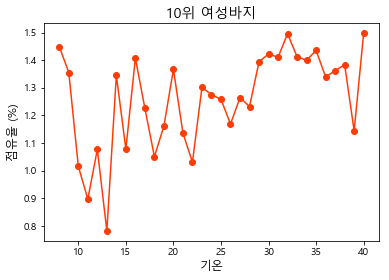

In [89]:
# 실행할때마다 다음 그래프 출력
temp = u
lol = project_main[project_main.CLAC3_NM==CT_TOP10.index[num]].groupby("T_MAX").sum()['PD_BUY_CT']/project_main.groupby("T_MAX").sum()['PD_BUY_CT']*100
plt.plot(temp,lol,color=colors_list[(num+1)*82],marker='o',linestyle='solid')
plt.title(str(num+1) +"위 "+CT_TOP10.index[num], fontproperties=font_main)
plt.ylabel("점유율 (%)", fontproperties=font_label)
plt.xlabel("기온", fontproperties=font_label)
plt.show()
if num >= 9:
    num= 0
else:
    num+=1

## 기온에 따른 구매 점유율(구매액 기준) (해당 상품군 구매액/ 총 구매액)*100

In [50]:
num=0

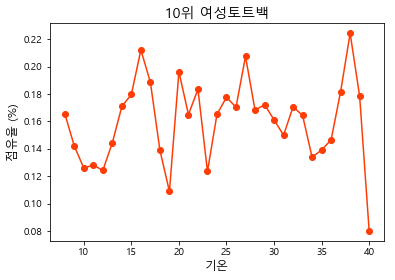

In [99]:
# 실행할때마다 다음 그래프 출력
temp = u
lol = project_main[project_main.CLAC3_NM==sum_TOP10.index[num]].groupby("T_MAX").sum()['PD_BUY_CT']/project_main.groupby("T_MAX").sum()['PD_BUY_CT']*100
plt.plot(temp,lol,color=colors_list[(num+1)*82],marker='o',linestyle='solid')
plt.title(str(num+1) +"위 "+sum_TOP10.index[num], fontproperties=font_main)
plt.ylabel("점유율 (%)", fontproperties=font_label)
plt.xlabel("기온", fontproperties=font_label)
plt.show()
if num >= 9:
    num= 0
else:
    num+=1

## 남성티셔츠 최다 구매 ID

In [52]:
project_tot[project_tot.CLNT_AGE == 20][project_tot.CLAC1_NM == "패션잡화"].sort_values("PD_BUY_AM",ascending=[False])[0:10]

C:\Anaconda3\envs\keras_gpu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,T_MIN,T_MAX,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,sum,plus,CLNT_GENDER,CLNT_AGE
3978232,929827,609951,57,51344,1개,프레드릭콘스탄트(시계),17779000.0,1.0,11,20180920,...,18.0,20,FC-945MC4H9,패션잡화,시계,남성시계,17779000.0,T,M,20
3978233,929827,609951,57,64167,1개,프레드릭콘스탄트(시계),14768000.0,1.0,11,20180920,...,18.0,20,FC-705V4S9,패션잡화,시계,남성시계,14768000.0,T,M,20
1048105,1904091,6484391,23,427300,사이즈:WOC / 1개,샤넬,3780000.0,1.0,35,20180614,...,18.0,22,퀼티드 블랙 램스킨 트렌디CC WOC - WOC,패션잡화,여성가방,여성크로스백,3780000.0,T,F,20
1380072,5907434,3972741,180,124838,사이즈:WOC / 1개,샤넬,3750000.0,1.0,18,20180725,...,28.0,32,퀼티드 블랙 램스킨 트렌디CC WOC - WOC,패션잡화,여성가방,여성크로스백,3750000.0,T,F,20
1845688,2847333,3216541,21,773956,1개,생로랑,3437000.0,1.0,45,20180807,...,26.0,32,생로랑 삭 드쥬르 베이비 421863 B681N 5440 PRUNE [YSB269pr],패션잡화,여성가방,여성숄더백,3437000.0,T,M,20
3939616,3417095,10324280,13,634436,1개,구찌,3100000.0,1.0,60,20180411,...,16.0,22,[실비] 가죽 미니 숄더백,패션잡화,여성가방,여성토트백,3100000.0,T,F,20
3976110,2426801,3600063,44,634476,1개,구찌,2980000.0,1.0,38,20180731,...,28.0,38,[GG 마몽] 가죽 탑 핸들 백,패션잡화,여성가방,여성토트백,2980000.0,T,F,20
2184828,4936593,8354974,31,819113,1개,구찌,2980000.0,1.0,206,20180514,...,15.0,26,[GG 마몽] 스몰 탑 핸들 백,패션잡화,여성가방,여성토트백,2980000.0,T,F,20
3447705,3353287,4159407,49,462518,1개,프라다,2900000.0,1.0,15,20180722,...,24.0,38,사피아노 퀴르 토트백 PRADA 1BG775 2A4A F0002,패션잡화,여성가방,여성숄더백,2900000.0,T,F,20
3969256,625066,6169359,118,462518,1개,프라다,2900000.0,1.0,3,20180619,...,19.0,27,사피아노 퀴르 토트백 PRADA 1BG775 2A4A F0002,패션잡화,여성가방,여성숄더백,2900000.0,T,F,20


In [53]:
big10= project_tot.groupby("CLNT_ID").sum()[['sum']].sort_values("sum",ascending=[False])[0:10]

In [54]:
project_main[project_main.CLAC3_NM=='남성티셔츠'].groupby("CLNT_ID").sum()[['PD_BUY_CT']].sort_values("PD_BUY_CT",ascending=[False])[0:4]

,PD_BUY_CT
CLNT_ID,
4957581,126.0
403038,60.0
4723740,43.0
977145,39.0


In [55]:
# 수정전 과 비교했을때 차이 발생
project_before[project_before.CLAC3_NM=='남성티셔츠'].groupby("CLNT_ID").sum()[['PD_BUY_CT']].sort_values("PD_BUY_CT",ascending=[False])[0:4]

,PD_BUY_CT
CLNT_ID,
3937516,159.0
4957581,133.0
4519079,117.0
403038,60.0


## 최다 구매 아이디는 4957581	

In [56]:
project_main[project_main.CLNT_ID == 4957581].groupby("CLAC3_NM").sum()[["PD_BUY_CT",'sum']].sort_values("sum", ascending=[False])

,PD_BUY_CT,sum
CLAC3_NM,,
남성티셔츠,126.0,2365620.0
LED,1.0,711050.0
남성캐주얼바지,20.0,620300.0
남성패딩,7.0,499000.0
여성원피스,3.0,435000.0
여성등산점퍼/재킷,4.0,225000.0
놀이방매트,1.0,200000.0
남성청바지,4.0,116000.0
여성바지,1.0,93000.0


# 번외 

In [57]:
project_tot.groupby("CLAC1_NM").sum().sort_values("sum", ascending=[False])

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DATE,T_MIN,T_MAX,sum,CLNT_AGE
CLAC1_NM,,,,,,,,,,,,,,,
패션잡화,1246773963531,2202011317920,31092627,173802978106,3.694585e+10,385716.0,72209370,7513656618386,40532839.0,6.220942e+08,7513656618386,6574988.0,9885873,3.725728e+10,12823190
여성의류,1843794421367,3227489042679,56653852,185654169643,2.780484e+10,555161.0,143868644,11049023206362,72841638.0,1.032079e+09,11049023206362,9631224.0,14565673,2.800249e+10,19848600
스포츠패션,1479098695626,2666967867258,41008945,183709169706,2.297903e+10,459423.0,78591842,8962563998228,51962258.0,7.534628e+08,8962563998228,7697211.0,11688760,2.342634e+10,15495040
화장품/뷰티케어,1552407610287,2605588532060,32894672,243719218021,2.164185e+10,512522.0,86438438,9317126850923,41615799.0,7.142803e+08,9317126850923,8226267.0,12353152,2.257445e+10,14969930
남성의류,1376172052990,2511575776967,42635551,159106599787,1.366313e+10,429489.0,81365380,8302453289659,52414462.0,7.429106e+08,8302453289659,7050920.0,10785851,1.391653e+10,14487600
가구,115775639184,193483998617,2293706,20316142301,9.147328e+09,41719.0,4960738,685940452611,3059131.0,5.682137e+07,685940452611,590489.0,894389,9.652045e+09,1175680
유아동의류,962611047857,1704978866540,33134324,104279086625,8.221224e+09,288458.0,55706394,5703915393262,40597504.0,5.487583e+08,5703915393262,4645415.0,7224413,8.317986e+09,9655310
생활/주방가전,110004943660,196975242372,2310051,18207056022,7.800062e+09,34251.0,5950298,665093355117,3131514.0,5.091332e+07,665093355117,572948.0,865583,7.882763e+09,1152190
건강식품,325577129268,492786946710,6474849,50793681054,6.389955e+09,122867.0,19266822,1921079939827,8794367.0,1.320171e+08,1921079939827,1708117.0,2541540,7.379826e+09,3349420
